# Project Torax XRay Image Classification

In this project we have 4 folders with commented images and the masks that we will use to train a model to automatic classify Torax XRay Images in the Classes:
* Covid
* Lung_opacity
* Normal
* Viral pneumonia

## The first step was cut the images by the mask
we load the images and the correspondent mask in a cicle and create a new image cuted and resized to ```244*244*3```. At the end all images are JPG with 3 colors and ```244*244``` size.

To balance the model we restict the max images to 1400 images for each category.

```
balanceXRay=XRay.loc[XRay['Tag']=='Viral Pneumonia']
balanceXRay=balanceXRay.append(XRay.loc[XRay['Tag']=='Normal'][0:1400], ignore_index=True)
balanceXRay=balanceXRay.append(XRay.loc[XRay['Tag']=='Lung_Opacity'][0:1400], ignore_index=True)
balanceXRay=balanceXRay.append(XRay.loc[XRay['Tag']=='COVID'][0:1400], ignore_index=True)
```
if necessary we can use the data Data Augmentation thecnics: ImageDataGenerator from Keras is used to perform data augmentation, which includes transformations like rotation, shifting, shearing, zooming, and flipping. This helps in generating more diverse training samples and making the model more robust.

## First model used
Our model is based on ResNet50.
A pre-trained ResNet50 model is loaded with weights trained on the ImageNet dataset.
Custom layers are added on top of the ResNet50 model for classification. I our case we add one dense layer
The model is compiled with Adam optimizer and categorical cross-entropy loss.


###First atemp output
 and the output was:
* Tthe execution is slow. After 6 hours the colab closes by timeout.
* The best acuracy we get was for epoch 6/50 with accuracy: 0.5446 then the model doesn't progress in a beter acuray in the next epochs.


```
Epoch 6/50
139/139 [==============================] - ETA: 0s - loss: 1.0838 - accuracy: 0.5446
Epoch 6: val_loss improved from 1.22104 to 1.10997, saving model to best_model.h5
139/139 [==============================] - 1346s 10s/step - loss: 1.0838 - accuracy: 0.5446 - val_loss: 1.1100 - val_accuracy: 0.4815 - lr: 0.0010
```

###the Callbacks
Callbacks like EarlyStopping, ReduceLROnPlateau, and ModelCheckpoint are defined to monitor the training process and make adjustments accordingly.
to implement this thecnique we need to store our model after trained.





For reference we also implement a Keras CNN.
we start with the simple model:
```
Model: "model"
_________________________________________________________________
Layer (type)                Output Shape              Param #  
=================================================================
Input (InputLayer)          [(None, 224, 224, 3)]     0        
 conv2d (Conv2D)             (None, 222, 222, 32)      896      
 max_pooling2d (MaxPooling2  D)  (None, 111, 111, 32)      0        
 dropout (Dropout)           (None, 111, 111, 32)      0        
 flatten (Flatten)           (None, 394272)            0        
 dense (Dense)               (None, 128)               50466944
 dense_1 (Dense)             (None, 4)                 516      
=================================================================

Total params: 50468356 (192.52 MB)
Trainable params: 50468356 (192.52 MB)
Non-trainable params: 0 (0.00 Byte)
```

After 5 epochs the trainning accuracy is 1, means it learn all that it can or bebause the model is to simple or the training data set is too small.

But the test acuracy is not so good

```
Test Accuracy: 0.6663661003112793
Test Loss: 1.5471841096878052
```

So to verify we add a new dense layer to augment the complexity:


```
Model: "model"

_________________________________________________________________

Layer (type)                Output Shape              Param #  

=================================================================

Input (InputLayer)          [(None, 224, 224, 3)]     0        
 conv2d (Conv2D)             (None, 222, 222, 32)      896      
 max_pooling2d (MaxPooling2 D) (None, 111, 111, 32)      0        
 dropout (Dropout)           (None, 111, 111, 32)      0        
 flatten (Flatten)           (None, 394272)            0        
 dense (Dense)               (None, 128)               50466944
 dense_1 (Dense)             (None, 134)               17286    
 dense_2 (Dense)             (None, 4)                 540      
=================================================================

Total params: 50485666 (192.59 MB)
Trainable params: 50485666 (192.59 MB)
Non-trainable params: 0 (0.00 Byte)
```

after 5 epocs trains the train acuracy is 100% bt the test resoult is not better:


```
Test Accuracy: 0.6456266641616821
Test Loss: 1.8581470251083374
```

Because the trainin thars more than 3 houres we introduce the way to load the best model h5 file and the ability to continue the training.
We also introduce one more convolution layer.




```
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 46cov_layer3 (Conv2D)       (None, 222, 222, 64)      1792      
 1max_pooll_layer (MaxPooling2D)  (None, 111, 111, 64)      0         
 Norm_layer (BatchNormalization)  (None, 111, 111, 64)      256       
 128cov_layer3 (Conv2D)      (None, 109, 109, 128)     73856     
 2max_pooll_layer (MaxPooling2D)  (None, 54, 54, 128)       0         
 dropout_layer20 (Dropout)   (None, 54, 54, 128)       0         
 0flat_layer (Flatten)       (None, 373248)            0         
 1dense_layer (Dense)        (None, 128)               47775872  
 2dense_layer (Dense)        (None, 134)               17286     
 output_dense_layer (Dense)  (None, 4)                 540       
=================================================================
Total params: 47869602 (182.61 MB)
Trainable params: 47869474 (182.61 MB)
Non-trainable params: 128 (512.00 Byte)
```

In this case after 5 epocs of training the train acurancy is 0.86 with loss 0.37.
The test data set produces with this 5 epocs training:

```
Test Accuracy: 0.695220947265625
Test Loss: 0.8363078832626343
```

So we load again the trained model with 5 epocs and train it again more 2 epos to improve the train acuracy but aboid overfit. the train accuracy get better to:

```
loss: 0.2192 - accuracy: 0.9243
```


and the acuracy for test dataset is:


```
Test Accuracy: 0.7042380571365356
Test Loss: 0.7575107216835022
```




We realise the Validation data set used during the train contain no data.
After correct that and with:
Found 3604 validated image filenames belonging to 4 classes.
Found 700 validated image filenames belonging to 4 classes.
Found 1109 validated image filenames belonging to 4 classes.

The improved keras model:
```
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 64cov_layer1 (Conv2D)       (None, 222, 222, 64)      1792      
 1max_pooll_layer (MaxPooling2D)  (None, 111, 111, 64)      0         
 128cov_layer2 (Conv2D)      (None, 109, 109, 128)     73856     
 2max_pooll_layer (MaxPooling2D)  (None, 54, 54, 128)       0         
 128cov_layer3 (Conv2D)      (None, 50, 50, 128)       409728    
 3max_pooll_layer (MaxPooling2D)  (None, 25, 25, 128)       0         
 dropout_layer20_2 (Dropout)  (None, 25, 25, 128)       0         
 0flat_layer (Flatten)       (None, 80000)             0         
 1dense_layer (Dense)        (None, 128)               10240128  
 2dense_layer (Dense)        (None, 134)               17286     
 output_dense_layer (Dense)  (None, 4)                 540       
=================================================================
Total params: 10743330 (40.98 MB)
Trainable params: 10743330 (40.98 MB)
Non-trainable params: 0 (0.00 Byte)
```

After 7 epocs of training the model obtain the results to the test data set:

Test Accuracy: 0.7150586247444153

Test Loss: 1.0974189043045044

Folow in the VGG 19 sugestion we test with our images the VGG19 that dosent converg and also the VGG16 with the same result.
After several simplifications we work with a simplified vertion of VGG16.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 64cov_l1 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 64cov_l2 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooll_l3 (MaxPooling2D  (None, 112, 112, 64)      0         
 )                                                               
                                                                 
 128cov_l4 (Conv2D)          (None, 112, 112, 64)      36928     
                                                                 
 max_pooll_l6 (MaxPooling2D  (None, 56, 56, 64)        0         
 )                                                               
                                                                 
 256cov_l7 (Conv2D)          (None, 56, 56, 64)        36928     
                                                                 
 256cov_l8 (Conv2D)          (None, 56, 56, 64)        36928     
                                                                 
 max_pooll_l11 (MaxPooling2  (None, 28, 28, 64)        0         
 D)                                                              
                                                                 
 256cov_l12 (Conv2D)         (None, 28, 28, 128)       73856     
                                                                 
 256cov_l13 (Conv2D)         (None, 28, 28, 128)       147584    
                                                                 
 max_pooll_l16 (MaxPooling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 flat_layer (Flatten)        (None, 25088)             0         
                                                                 
 dense_l23 (Dense)           (None, 64)                1605696   
                                                                 
 dense_l24 (Dense)           (None, 128)               8320      
                                                                 
 output_dense_26 (Dense)     (None, 4)                 516       
                                                                 
=================================================================
Total params: 1985476 (7.57 MB)
Trainable params: 1985476 (7.57 MB)
Non-trainable params: 0 (0.00 Byte)

we train this CNN with 17000 images for 12 epocs with the acuracy results for the test dataset:

2400/2400 [==============================] - 292s 122ms/step - loss: 0.4335 - accuracy: 0.8275
Test Accuracy: 0.8274999856948853
Test Loss: 0.4335298538208008

notice for this dataset size we have more than 3 hours per epoc.

It was also made tests with Our initial model is based on ResNet50 also UNet model and with augmented data.

The RestNet50  Model after determinded validations data set :-

Downloading data from https://storage.googleapis.com/tensorflow/keras-applications/resnet/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
94765736/94765736 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
==================================================================================================
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                              
                                                                                                  
 conv1_relu (Activation)     (None, 112, 112, 64)         0         ['conv1_bn[0][0]']            
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_relu[0][0]']          
                                                                                                  
 pool1_pool (MaxPooling2D)   (None, 56, 56, 64)           0         ['pool1_pad[0][0]']           
                                                                                                  
 conv2_block1_1_conv (Conv2  (None, 56, 56, 64)           4160      ['pool1_pool[0][0]']          
 D)                                                                                               
                                                                                                  
 conv2_block1_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block1_1_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv2_block1_1_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block1_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_block1_2_conv (Conv2  (None, 56, 56, 64)           36928     ['conv2_block1_1_relu[0][0]']
 D)                                                                                               
                                                                                                  
 conv2_block1_2_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block1_2_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv2_block1_2_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_block1_0_conv (Conv2  (None, 56, 56, 256)          16640     ['pool1_pool[0][0]']          
 D)                                                                                               
                                                                                                  
 conv2_block1_3_conv (Conv2  (None, 56, 56, 256)          16640     ['conv2_block1_2_relu[0][0]']
 D)                                                                                               
                                                                                                  
 conv2_block1_0_bn (BatchNo  (None, 56, 56, 256)          1024      ['conv2_block1_0_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv2_block1_3_bn (BatchNo  (None, 56, 56, 256)          1024      ['conv2_block1_3_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv2_block1_add (Add)      (None, 56, 56, 256)          0         ['conv2_block1_0_bn[0][0]',   
                                                                     'conv2_block1_3_bn[0][0]']   
                                                                                                  
 conv2_block1_out (Activati  (None, 56, 56, 256)          0         ['conv2_block1_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv2_block2_1_conv (Conv2  (None, 56, 56, 64)           16448     ['conv2_block1_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block2_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block2_1_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv2_block2_1_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block2_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_block2_2_conv (Conv2  (None, 56, 56, 64)           36928     ['conv2_block2_1_relu[0][0]']
 D)                                                                                               
                                                                                                  
 conv2_block2_2_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block2_2_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv2_block2_2_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block2_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_block2_3_conv (Conv2  (None, 56, 56, 256)          16640     ['conv2_block2_2_relu[0][0]']
 D)                                                                                               
                                                                                                  
 conv2_block2_3_bn (BatchNo  (None, 56, 56, 256)          1024      ['conv2_block2_3_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv2_block2_add (Add)      (None, 56, 56, 256)          0         ['conv2_block1_out[0][0]',    
                                                                     'conv2_block2_3_bn[0][0]']   
                                                                                                  
 conv2_block2_out (Activati  (None, 56, 56, 256)          0         ['conv2_block2_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 56, 56, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block3_1_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_block3_2_conv (Conv2  (None, 56, 56, 64)           36928     ['conv2_block3_1_relu[0][0]']
 D)                                                                                               
                                                                                                  
 conv2_block3_2_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block3_2_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_2_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block3_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_block3_3_conv (Conv2  (None, 56, 56, 256)          16640     ['conv2_block3_2_relu[0][0]']
 D)                                                                                               
                                                                                                  
 conv2_block3_3_bn (BatchNo  (None, 56, 56, 256)          1024      ['conv2_block3_3_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_add (Add)      (None, 56, 56, 256)          0         ['conv2_block2_out[0][0]',    
                                                                     'conv2_block3_3_bn[0][0]']   
                                                                                                  
 conv2_block3_out (Activati  (None, 56, 56, 256)          0         ['conv2_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv3_block1_1_conv (Conv2  (None, 28, 28, 128)          32896     ['conv2_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv3_block1_1_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block1_1_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv3_block1_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block1_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block1_2_conv (Conv2  (None, 28, 28, 128)          147584    ['conv3_block1_1_relu[0][0]']
 D)                                                                                               
                                                                                                  
 conv3_block1_2_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block1_2_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv3_block1_2_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block1_0_conv (Conv2  (None, 28, 28, 512)          131584    ['conv2_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv3_block1_3_conv (Conv2  (None, 28, 28, 512)          66048     ['conv3_block1_2_relu[0][0]']
 D)                                                                                               
                                                                                                  
 conv3_block1_0_bn (BatchNo  (None, 28, 28, 512)          2048      ['conv3_block1_0_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv3_block1_3_bn (BatchNo  (None, 28, 28, 512)          2048      ['conv3_block1_3_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv3_block1_add (Add)      (None, 28, 28, 512)          0         ['conv3_block1_0_bn[0][0]',   
                                                                     'conv3_block1_3_bn[0][0]']   
                                                                                                  
 conv3_block1_out (Activati  (None, 28, 28, 512)          0         ['conv3_block1_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv3_block2_1_conv (Conv2  (None, 28, 28, 128)          65664     ['conv3_block1_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv3_block2_1_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block2_1_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block2_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block2_2_conv (Conv2  (None, 28, 28, 128)          147584    ['conv3_block2_1_relu[0][0]']
 D)                                                                                               
                                                                                                  
 conv3_block2_2_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block2_2_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_2_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block2_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 28, 28, 512)          66048     ['conv3_block2_2_relu[0][0]']
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 28, 28, 512)          2048      ['conv3_block2_3_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 28, 28, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
                                                                                                  
 conv3_block2_out (Activati  (None, 28, 28, 512)          0         ['conv3_block2_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv3_block3_1_conv (Conv2  (None, 28, 28, 128)          65664     ['conv3_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv3_block3_1_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block3_1_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv3_block3_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block3_2_conv (Conv2  (None, 28, 28, 128)          147584    ['conv3_block3_1_relu[0][0]']
 D)                                                                                               
                                                                                                  
 conv3_block3_2_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block3_2_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv3_block3_2_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block3_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block3_3_conv (Conv2  (None, 28, 28, 512)          66048     ['conv3_block3_2_relu[0][0]']
 D)                                                                                               
                                                                                                  
 conv3_block3_3_bn (BatchNo  (None, 28, 28, 512)          2048      ['conv3_block3_3_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv3_block3_add (Add)      (None, 28, 28, 512)          0         ['conv3_block2_out[0][0]',    
                                                                     'conv3_block3_3_bn[0][0]']   
                                                                                                  
 conv3_block3_out (Activati  (None, 28, 28, 512)          0         ['conv3_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv3_block4_1_conv (Conv2  (None, 28, 28, 128)          65664     ['conv3_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv3_block4_1_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block4_1_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv3_block4_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block4_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block4_2_conv (Conv2  (None, 28, 28, 128)          147584    ['conv3_block4_1_relu[0][0]']
 D)                                                                                               
                                                                                                  
 conv3_block4_2_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block4_2_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv3_block4_2_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block4_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block4_3_conv (Conv2  (None, 28, 28, 512)          66048     ['conv3_block4_2_relu[0][0]']
 D)                                                                                               
                                                                                                  
 conv3_block4_3_bn (BatchNo  (None, 28, 28, 512)          2048      ['conv3_block4_3_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv3_block4_add (Add)      (None, 28, 28, 512)          0         ['conv3_block3_out[0][0]',    
                                                                     'conv3_block4_3_bn[0][0]']   
                                                                                                  
 conv3_block4_out (Activati  (None, 28, 28, 512)          0         ['conv3_block4_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block1_1_conv (Conv2  (None, 14, 14, 256)          131328    ['conv3_block4_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block1_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block1_1_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_1_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block1_1_relu[0][0]']
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block1_2_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 14, 14, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block1_3_conv (Conv2  (None, 14, 14, 1024)         263168    ['conv4_block1_2_relu[0][0]']
 D)                                                                                               
                                                                                                  
 conv4_block1_0_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block1_0_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block1_3_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block1_0_bn[0][0]',   
                                                                     'conv4_block1_3_bn[0][0]']   
                                                                                                  
 conv4_block1_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block1_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block2_1_conv (Conv2  (None, 14, 14, 256)          262400    ['conv4_block1_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block2_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block2_1_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv4_block2_1_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block2_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block2_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block2_1_relu[0][0]']
 D)                                                                                               
                                                                                                  
 conv4_block2_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block2_2_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv4_block2_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block2_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block2_3_conv (Conv2  (None, 14, 14, 1024)         263168    ['conv4_block2_2_relu[0][0]']
 D)                                                                                               
                                                                                                  
 conv4_block2_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block2_3_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv4_block2_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block1_out[0][0]',    
                                                                     'conv4_block2_3_bn[0][0]']   
                                                                                                  
 conv4_block2_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block2_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block3_1_conv (Conv2  (None, 14, 14, 256)          262400    ['conv4_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block3_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block3_1_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv4_block3_1_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block3_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block3_1_relu[0][0]']
 D)                                                                                               
                                                                                                  
 conv4_block3_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block3_2_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv4_block3_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block3_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block3_3_conv (Conv2  (None, 14, 14, 1024)         263168    ['conv4_block3_2_relu[0][0]']
 D)                                                                                               
                                                                                                  
 conv4_block3_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block3_3_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv4_block3_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block2_out[0][0]',    
                                                                     'conv4_block3_3_bn[0][0]']   
                                                                                                  
 conv4_block3_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 14, 14, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block4_1_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv4_block4_1_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block4_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block4_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block4_1_relu[0][0]']
 D)                                                                                               
                                                                                                  
 conv4_block4_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block4_2_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv4_block4_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block4_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block4_3_conv (Conv2  (None, 14, 14, 1024)         263168    ['conv4_block4_2_relu[0][0]']
 D)                                                                                               
                                                                                                  
 conv4_block4_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block4_3_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv4_block4_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block3_out[0][0]',    
                                                                     'conv4_block4_3_bn[0][0]']   
                                                                                                  
 conv4_block4_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block4_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block5_1_conv (Conv2  (None, 14, 14, 256)          262400    ['conv4_block4_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block5_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block5_1_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv4_block5_1_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block5_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block5_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block5_1_relu[0][0]']
 D)                                                                                               
                                                                                                  
 conv4_block5_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block5_2_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv4_block5_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block5_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block5_3_conv (Conv2  (None, 14, 14, 1024)         263168    ['conv4_block5_2_relu[0][0]']
 D)                                                                                               
                                                                                                  
 conv4_block5_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block5_3_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv4_block5_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block4_out[0][0]',    
                                                                     'conv4_block5_3_bn[0][0]']   
                                                                                                  
 conv4_block5_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block5_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block6_1_conv (Conv2  (None, 14, 14, 256)          262400    ['conv4_block5_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block6_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block6_1_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_1_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block6_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block6_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block6_1_relu[0][0]']
 D)                                                                                               
                                                                                                  
 conv4_block6_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block6_2_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block6_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block6_3_conv (Conv2  (None, 14, 14, 1024)         263168    ['conv4_block6_2_relu[0][0]']
 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block6_3_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv5_block1_1_conv (Conv2  (None, 7, 7, 512)            524800    ['conv4_block6_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv5_block1_1_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block1_1_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv5_block1_1_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block1_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block1_2_conv (Conv2  (None, 7, 7, 512)            2359808   ['conv5_block1_1_relu[0][0]']
 D)                                                                                               
                                                                                                  
 conv5_block1_2_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block1_2_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv5_block1_2_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block1_0_conv (Conv2  (None, 7, 7, 2048)           2099200   ['conv4_block6_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv5_block1_3_conv (Conv2  (None, 7, 7, 2048)           1050624   ['conv5_block1_2_relu[0][0]']
 D)                                                                                               
                                                                                                  
 conv5_block1_0_bn (BatchNo  (None, 7, 7, 2048)           8192      ['conv5_block1_0_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv5_block1_3_bn (BatchNo  (None, 7, 7, 2048)           8192      ['conv5_block1_3_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv5_block1_add (Add)      (None, 7, 7, 2048)           0         ['conv5_block1_0_bn[0][0]',   
                                                                     'conv5_block1_3_bn[0][0]']   
                                                                                                  
 conv5_block1_out (Activati  (None, 7, 7, 2048)           0         ['conv5_block1_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv5_block2_1_conv (Conv2  (None, 7, 7, 512)            1049088   ['conv5_block1_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv5_block2_1_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block2_1_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv5_block2_1_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block2_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block2_2_conv (Conv2  (None, 7, 7, 512)            2359808   ['conv5_block2_1_relu[0][0]']
 D)                                                                                               
                                                                                                  
 conv5_block2_2_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block2_2_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv5_block2_2_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block2_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block2_3_conv (Conv2  (None, 7, 7, 2048)           1050624   ['conv5_block2_2_relu[0][0]']
 D)                                                                                               
                                                                                                  
 conv5_block2_3_bn (BatchNo  (None, 7, 7, 2048)           8192      ['conv5_block2_3_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv5_block2_add (Add)      (None, 7, 7, 2048)           0         ['conv5_block1_out[0][0]',    
                                                                     'conv5_block2_3_bn[0][0]']   
                                                                                                  
 conv5_block2_out (Activati  (None, 7, 7, 2048)           0         ['conv5_block2_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv5_block3_1_conv (Conv2  (None, 7, 7, 512)            1049088   ['conv5_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv5_block3_1_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block3_1_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_1_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 7, 7, 512)            2359808   ['conv5_block3_1_relu[0][0]']
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block3_2_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_3_conv (Conv2  (None, 7, 7, 2048)           1050624   ['conv5_block3_2_relu[0][0]']
 D)                                                                                               
                                                                                                  
 conv5_block3_3_bn (BatchNo  (None, 7, 7, 2048)           8192      ['conv5_block3_3_conv[0][0]']
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_add (Add)      (None, 7, 7, 2048)           0         ['conv5_block2_out[0][0]',    
                                                                     'conv5_block3_3_bn[0][0]']   
                                                                                                  
 conv5_block3_out (Activati  (None, 7, 7, 2048)           0         ['conv5_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv2d (Conv2D)             (None, 5, 5, 64)             1179712   ['conv5_block3_out[0][0]']    
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 2, 2, 64)             0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv2d_1 (Conv2D)           (None, 2, 2, 128)            73856     ['max_pooling2d[0][0]']       
                                                                                                  
 max_pooling2d_1 (MaxPoolin  (None, 1, 1, 128)            0         ['conv2d_1[0][0]']            
 g2D)                                                                                             
                                                                                                  
 conv2d_2 (Conv2D)           (None, 1, 1, 128)            409728    ['max_pooling2d_1[0][0]']     
                                                                                                  
 dropout (Dropout)           (None, 1, 1, 128)            0         ['conv2d_2[0][0]']            
                                                                                                  
 flatten (Flatten)           (None, 128)                  0         ['dropout[0][0]']             
                                                                                                  
 dense (Dense)               (None, 128)                  16512     ['flatten[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 134)                  17286     ['dense[0][0]']               
                                                                                                  
 dense_2 (Dense)             (None, 4)                    540       ['dense_1[0][0]']             
                                                                                                  
==================================================================================================
Total params: 25285346 (96.46 MB)
Trainable params: 1697634 (6.48 MB)
Non-trainable params: 23587712 (89.98 MB)





The Model after tranining with 25 epochs .





Epoch 1/25

57/57 [==============================] - 33s 419ms/step - loss: 1.3816 - accuracy: 0.2653 - val_loss: 1.3212 - val_accuracy: 0.3871

Epoch 2/25

Epoch 2: loss improved from 1.38162 to 1.16432
57/57 [==============================] - 24s 411ms/step - loss: 1.1643 - accuracy: 0.4581 - val_loss: 1.0217 - val_accuracy: 0.5143

Epoch 3/25

Epoch 3: loss improved from 1.16432 to 0.95980
57/57 [==============================] - 25s 426ms/step - loss: 0.9598 - accuracy: 0.5658 - val_loss: 0.8467 - val_accuracy: 0.6400

Epoch 4/25

Epoch 4: loss improved from 0.95980 to 0.86137
57/57 [==============================] - 24s 416ms/step - loss: 0.8614 - accuracy: 0.6301 - val_loss: 0.7459 - val_accuracy: 0.6743

Epoch 5/25

Epoch 5: loss improved from 0.86137 to 0.78620
57/57 [==============================] - 24s 412ms/step - loss: 0.7862 - accuracy: 0.6629 - val_loss: 0.6687 - val_accuracy: 0.7229

Epoch 6/25

Epoch 6: loss improved from 0.78620 to 0.77952
57/57 [==============================] - 29s 503ms/step - loss: 0.7795 - accuracy: 0.6723 - val_loss: 0.7515 - val_accuracy: 0.6729

Epoch 7/25

Epoch 7: loss improved from 0.77952 to 0.74275
57/57 [==============================] - 28s 498ms/step - loss: 0.7427 - accuracy: 0.6792 - val_loss: 0.7015 - val_accuracy: 0.7057

Epoch 8/25

Epoch 8: loss improved from 0.74275 to 0.74146
57/57 [==============================] - 26s 456ms/step - loss: 0.7415 - accuracy: 0.6876 - val_loss: 0.6646 - val_accuracy: 0.7157

Epoch 9/25

Epoch 9: loss improved from 0.74146 to 0.69423
57/57 [==============================] - 25s 439ms/step - loss: 0.6942 - accuracy: 0.7109 - val_loss: 0.6752 - val_accuracy: 0.7114

Epoch 10/25

Epoch 10: loss did not improve from 0.69423
57/57 [==============================] - 24s 416ms/step - loss: 0.7080 - accuracy: 0.7034 - val_loss: 0.6894 - val_accuracy: 0.7129

Epoch 11/25

Epoch 11: loss improved from 0.69423 to 0.64626
57/57 [==============================] - 23s 402ms/step - loss: 0.6463 - accuracy: 0.7347 - val_loss: 0.6900 - val_accuracy: 0.6914

Epoch 12/25

Epoch 12: loss improved from 0.64626 to 0.61602
57/57 [==============================] - 25s 429ms/step - loss: 0.6160 - accuracy: 0.7408 - val_loss: 0.6086 - val_accuracy: 0.7500

Epoch 13/25

Epoch 13: loss improved from 0.61602 to 0.61455
57/57 [==============================] - 25s 424ms/step - loss: 0.6145 - accuracy: 0.7481 - val_loss: 0.6052 - val_accuracy: 0.7400

Epoch 14/25

Epoch 14: loss improved from 0.61455 to 0.61111
57/57 [==============================] - 25s 429ms/step - loss: 0.6111 - accuracy: 0.7431 - val_loss: 0.6098 - val_accuracy: 0.7529

Epoch 15/25

Epoch 15: loss did not improve from 0.61111
57/57 [==============================] - 22s 391ms/step - loss: 0.6404 - accuracy: 0.7353 - val_loss: 0.6195 - val_accuracy: 0.7257

Epoch 16/25

Epoch 16: loss improved from 0.61111 to 0.60365
57/57 [==============================] - 24s 422ms/step - loss: 0.6036 - accuracy: 0.7483 - val_loss: 0.7217 - val_accuracy: 0.7086

Epoch 17/25

Epoch 17: loss improved from 0.60365 to 0.59477
57/57 [==============================] - 24s 417ms/step - loss: 0.5948 - accuracy: 0.7517 - val_loss: 0.6007 - val_accuracy: 0.7529

Epoch 18/25

Epoch 18: loss improved from 0.59477 to 0.55747
57/57 [==============================] - 24s 418ms/step - loss: 0.5575 - accuracy: 0.7739 - val_loss: 0.6311 - val_accuracy: 0.7386

Epoch 19/25

Epoch 19: loss improved from 0.55747 to 0.53723
57/57 [==============================] - 24s 416ms/step - loss: 0.5372 - accuracy: 0.7794 - val_loss: 0.6341 - val_accuracy: 0.7386

Epoch 20/25

Epoch 20: loss did not improve from 0.53723
57/57 [==============================] - 24s 413ms/step - loss: 0.5387 - accuracy: 0.7844 - val_loss: 0.6674 - val_accuracy: 0.7357

Epoch 21/25

Epoch 21: loss did not improve from 0.53723
57/57 [==============================] - 22s 389ms/step - loss: 0.5442 - accuracy: 0.7861 - val_loss: 0.6091 - val_accuracy: 0.7629

Epoch 22/25

Epoch 22: loss did not improve from 0.53723
57/57 [==============================] - 22s 383ms/step - loss: 0.5551 - accuracy: 0.7783 - val_loss: 0.5975 - val_accuracy: 0.7557

Epoch 23/25

Epoch 23: loss did not improve from 0.53723
57/57 [==============================] - 22s 385ms/step - loss: 0.5378 - accuracy: 0.7808 - val_loss: 0.6228 - val_accuracy: 0.7514

Epoch 24/25

Epoch 24: loss improved from 0.53723 to 0.52390
57/57 [==============================] - 24s 421ms/step - loss: 0.5239 - accuracy: 0.7938 - val_loss: 0.6519 - val_accuracy: 0.7371

Epoch 25/25

Epoch 25: loss did not improve from 0.52390
57/57 [==============================] - 23s 402ms/step - loss: 0.5488 - accuracy: 0.7844 - val_loss: 0.6447 - val_accuracy: 0.7129






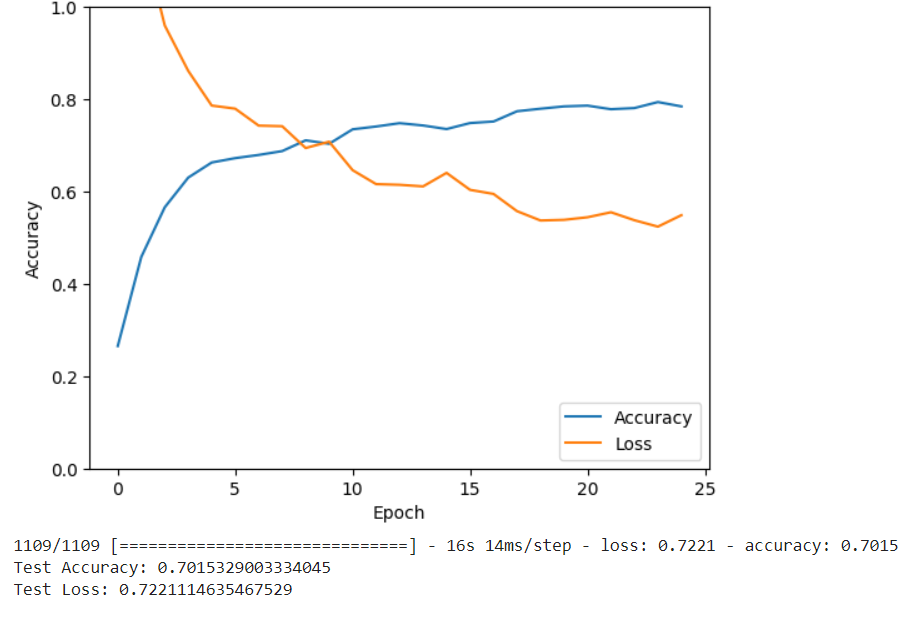





Then U-Net Model : -

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to
==================================================================================================
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []
 conv2d (Conv2D)             (None, 224, 224, 64)         1792      ['input_1[0][0]']
 conv2d_1 (Conv2D)           (None, 224, 224, 64)         36928     ['conv2d[0][0]']
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)         0         ['conv2d_1[0][0]']
 D)
 up_sampling2d (UpSampling2  (None, 224, 224, 64)         0         ['max_pooling2d[0][0]']
 D)
 concatenate (Concatenate)   (None, 224, 224, 128)        0         ['up_sampling2d[0][0]',
                                                                     'conv2d_1[0][0]']
 conv2d_2 (Conv2D)           (None, 224, 224, 64)         73792     ['concatenate[0][0]']
 conv2d_3 (Conv2D)           (None, 224, 224, 64)         36928     ['conv2d_2[0][0]']
 conv2d_4 (Conv2D)           (None, 224, 224, 128)        73856     ['conv2d_3[0][0]']
 max_pooling2d_1 (MaxPoolin  (None, 112, 112, 128)        0         ['conv2d_4[0][0]']
 g2D)
 conv2d_5 (Conv2D)           (None, 112, 112, 128)        409728    ['max_pooling2d_1[0][0]']
 dropout (Dropout)           (None, 112, 112, 128)        0         ['conv2d_5[0][0]']
 flatten (Flatten)           (None, 1605632)              0         ['dropout[0][0]']
 dense (Dense)               (None, 128)                  2055210   ['flatten[0][0]']
                                                          24
 dense_1 (Dense)             (None, 134)                  17286     ['dense[0][0]']
 dense_2 (Dense)             (None, 4)                    540       ['dense_1[0][0]']
==================================================================================================
Total params: 206171874 (786.48 MB)
Trainable params: 206171874 (786.48 MB)
Non-trainable params: 0 (0.00 Byte)




Training the U-Net Model with 15 epochs : -


Epoch 1/15
57/57 [==============================] - ETA: 0s - loss: 1.1746 - accuracy: 0.5197
Epoch 1: loss improved from inf to 1.17462, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
57/57 [==============================] - 1292s 22s/step - loss: 1.1746 - accuracy: 0.5197 - val_loss: 0.8949 - val_accuracy: 0.6043
Epoch 2/15
57/57 [==============================] - ETA: 0s - loss: 0.8363 - accuracy: 0.6407
Epoch 2: loss improved from 1.17462 to 0.83627, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
57/57 [==============================] - 136s 2s/step - loss: 0.8363 - accuracy: 0.6407 - val_loss: 0.8016 - val_accuracy: 0.6614
Epoch 3/15
57/57 [==============================] - ETA: 0s - loss: 0.6907 - accuracy: 0.7128
Epoch 3: loss improved from 0.83627 to 0.69072, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
57/57 [==============================] - 150s 3s/step - loss: 0.6907 - accuracy: 0.7128 - val_loss: 0.8299 - val_accuracy: 0.6557
Epoch 4/15
57/57 [==============================] - ETA: 0s - loss: 0.5495 - accuracy: 0.7716
Epoch 4: loss improved from 0.69072 to 0.54946, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
57/57 [==============================] - 168s 3s/step - loss: 0.5495 - accuracy: 0.7716 - val_loss: 0.8728 - val_accuracy: 0.6714
Epoch 5/15
57/57 [==============================] - ETA: 0s - loss: 0.3906 - accuracy: 0.8449
Epoch 5: loss improved from 0.54946 to 0.39061, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
57/57 [==============================] - 136s 2s/step - loss: 0.3906 - accuracy: 0.8449 - val_loss: 1.0148 - val_accuracy: 0.6829
Epoch 6/15
57/57 [==============================] - ETA: 0s - loss: 0.2516 - accuracy: 0.9018
Epoch 6: loss improved from 0.39061 to 0.25155, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
57/57 [==============================] - 164s 3s/step - loss: 0.2516 - accuracy: 0.9018 - val_loss: 1.2611 - val_accuracy: 0.6629
Epoch 7/15
57/57 [==============================] - ETA: 0s - loss: 0.1492 - accuracy: 0.9467
Epoch 7: loss improved from 0.25155 to 0.14915, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
57/57 [==============================] - 129s 2s/step - loss: 0.1492 - accuracy: 0.9467 - val_loss: 1.6501 - val_accuracy: 0.6500
Epoch 8/15
57/57 [==============================] - ETA: 0s - loss: 0.0851 - accuracy: 0.9723
Epoch 8: loss improved from 0.14915 to 0.08508, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
57/57 [==============================] - 208s 4s/step - loss: 0.0851 - accuracy: 0.9723 - val_loss: 2.0923 - val_accuracy: 0.6729
Epoch 9/15
57/57 [==============================] - ETA: 0s - loss: 0.0774 - accuracy: 0.9745
Epoch 9: loss improved from 0.08508 to 0.07743, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
57/57 [==============================] - 130s 2s/step - loss: 0.0774 - accuracy: 0.9745 - val_loss: 1.9570 - val_accuracy: 0.6586
Epoch 10/15
57/57 [==============================] - ETA: 0s - loss: 0.0553 - accuracy: 0.9831
Epoch 10: loss improved from 0.07743 to 0.05532, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
57/57 [==============================] - 127s 2s/step - loss: 0.0553 - accuracy: 0.9831 - val_loss: 2.0192 - val_accuracy: 0.6657
Epoch 11/15
57/57 [==============================] - ETA: 0s - loss: 0.0336 - accuracy: 0.9889
Epoch 11: loss improved from 0.05532 to 0.03362, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
57/57 [==============================] - 165s 3s/step - loss: 0.0336 - accuracy: 0.9889 - val_loss: 2.2629 - val_accuracy: 0.6400
Epoch 12/15
57/57 [==============================] - ETA: 0s - loss: 0.0109 - accuracy: 0.9967
Epoch 12: loss improved from 0.03362 to 0.01085, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
57/57 [==============================] - 180s 3s/step - loss: 0.0109 - accuracy: 0.9967 - val_loss: 3.4828 - val_accuracy: 0.6557
Epoch 13/15
57/57 [==============================] - ETA: 0s - loss: 0.0177 - accuracy: 0.9947
Epoch 13: loss did not improve from 0.01085
57/57 [==============================] - 103s 2s/step - loss: 0.0177 - accuracy: 0.9947 - val_loss: 2.8668 - val_accuracy: 0.6643
Epoch 14/15
57/57 [==============================] - ETA: 0s - loss: 0.0325 - accuracy: 0.9911
Epoch 14: loss did not improve from 0.01085
57/57 [==============================] - 103s 2s/step - loss: 0.0325 - accuracy: 0.9911 - val_loss: 2.6577 - val_accuracy: 0.6514
Epoch 15/15
57/57 [==============================] - ETA: 0s - loss: 0.0342 - accuracy: 0.9897
Epoch 15: loss did not improve from 0.01085
57/57 [==============================] - 104s 2s/step - loss: 0.0342 - accuracy: 0.9897 - val_loss: 3.2312 - val_accuracy: 0.6614








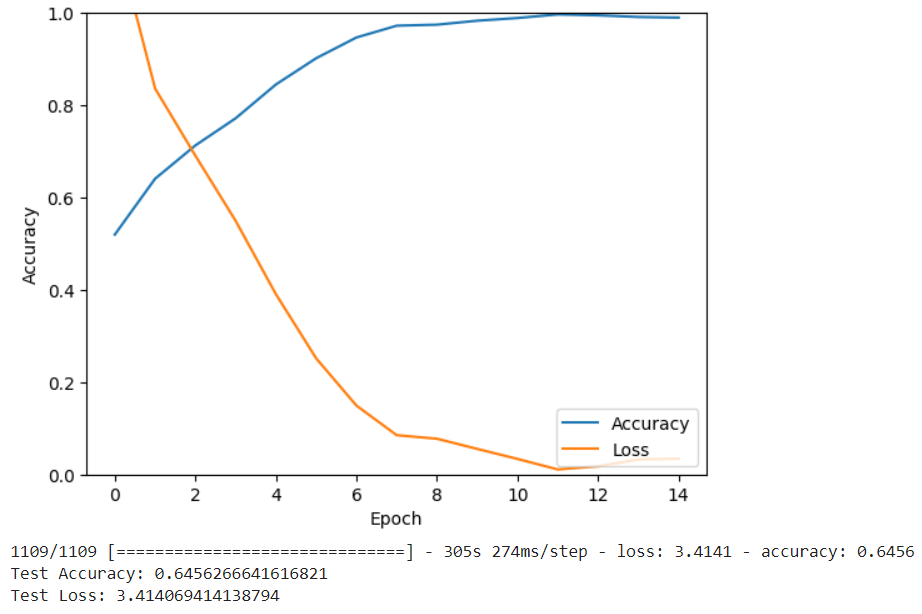



Although this model training very well the accuracy number test data set is not good.There is something wrong in test data set





The result of the ResNet50 model after the editing test data set became 10% validated data set 30% training 60% .


Epoch 1/15
52/52 [==============================] - ETA: 0s - loss: 1.3896 - accuracy: 0.2645
Epoch 1: loss improved from inf to 1.38959, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
52/52 [==============================] - 2295s 44s/step - loss: 1.3896 - accuracy: 0.2645 - val_loss: 1.3833 - val_accuracy: 0.2784
Epoch 2/15
52/52 [==============================] - ETA: 0s - loss: 1.3800 - accuracy: 0.2837
Epoch 2: loss improved from 1.38959 to 1.38003, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
52/52 [==============================] - 30s 579ms/step - loss: 1.3800 - accuracy: 0.2837 - val_loss: 1.3600 - val_accuracy: 0.2940
Epoch 3/15
52/52 [==============================] - ETA: 0s - loss: 1.3182 - accuracy: 0.3496
Epoch 3: loss improved from 1.38003 to 1.31821, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
52/52 [==============================] - 29s 552ms/step - loss: 1.3182 - accuracy: 0.3496 - val_loss: 1.2423 - val_accuracy: 0.4101
Epoch 4/15
52/52 [==============================] - ETA: 0s - loss: 1.1985 - accuracy: 0.4382
Epoch 4: loss improved from 1.31821 to 1.19854, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
52/52 [==============================] - 30s 569ms/step - loss: 1.1985 - accuracy: 0.4382 - val_loss: 1.1758 - val_accuracy: 0.4811
Epoch 5/15
52/52 [==============================] - ETA: 0s - loss: 1.1173 - accuracy: 0.4815
Epoch 5: loss improved from 1.19854 to 1.11734, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
52/52 [==============================] - 29s 556ms/step - loss: 1.1173 - accuracy: 0.4815 - val_loss: 1.0399 - val_accuracy: 0.5346
Epoch 6/15
52/52 [==============================] - ETA: 0s - loss: 0.9886 - accuracy: 0.5729
Epoch 6: loss improved from 1.11734 to 0.98861, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
52/52 [==============================] - 28s 548ms/step - loss: 0.9886 - accuracy: 0.5729 - val_loss: 1.0387 - val_accuracy: 0.5460
Epoch 7/15
52/52 [==============================] - ETA: 0s - loss: 0.9121 - accuracy: 0.6014
Epoch 7: loss improved from 0.98861 to 0.91209, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
52/52 [==============================] - 29s 553ms/step - loss: 0.9121 - accuracy: 0.6014 - val_loss: 0.8563 - val_accuracy: 0.6338
Epoch 8/15
52/52 [==============================] - ETA: 0s - loss: 0.8257 - accuracy: 0.6423
Epoch 8: loss improved from 0.91209 to 0.82575, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
52/52 [==============================] - 29s 559ms/step - loss: 0.8257 - accuracy: 0.6423 - val_loss: 0.7749 - val_accuracy: 0.6615
Epoch 9/15
52/52 [==============================] - ETA: 0s - loss: 0.7826 - accuracy: 0.6549
Epoch 9: loss improved from 0.82575 to 0.78262, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
52/52 [==============================] - 29s 551ms/step - loss: 0.7826 - accuracy: 0.6549 - val_loss: 0.7648 - val_accuracy: 0.6633
Epoch 10/15
52/52 [==============================] - ETA: 0s - loss: 0.7565 - accuracy: 0.6727
Epoch 10: loss improved from 0.78262 to 0.75651, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
52/52 [==============================] - 29s 547ms/step - loss: 0.7565 - accuracy: 0.6727 - val_loss: 0.8602 - val_accuracy: 0.6242
Epoch 11/15
52/52 [==============================] - ETA: 0s - loss: 0.7770 - accuracy: 0.6652
Epoch 11: loss did not improve from 0.75651
52/52 [==============================] - 27s 512ms/step - loss: 0.7770 - accuracy: 0.6652 - val_loss: 0.7379 - val_accuracy: 0.6753
Epoch 12/15
52/52 [==============================] - ETA: 0s - loss: 0.7285 - accuracy: 0.6835
Epoch 12: loss improved from 0.75651 to 0.72847, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
52/52 [==============================] - 28s 546ms/step - loss: 0.7285 - accuracy: 0.6835 - val_loss: 0.7282 - val_accuracy: 0.6789
Epoch 13/15
52/52 [==============================] - ETA: 0s - loss: 0.7342 - accuracy: 0.6826
Epoch 13: loss did not improve from 0.72847
52/52 [==============================] - 26s 504ms/step - loss: 0.7342 - accuracy: 0.6826 - val_loss: 0.7559 - val_accuracy: 0.6645
Epoch 14/15
52/52 [==============================] - ETA: 0s - loss: 0.7417 - accuracy: 0.6814
Epoch 14: loss did not improve from 0.72847
52/52 [==============================] - 27s 510ms/step - loss: 0.7417 - accuracy: 0.6814 - val_loss: 0.7825 - val_accuracy: 0.6536
Epoch 15/15
52/52 [==============================] - ETA: 0s - loss: 0.6841 - accuracy: 0.6958
Epoch 15: loss improved from 0.72847 to 0.68411, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
52/52 [==============================] - 28s 546ms/step - loss: 0.6841 - accuracy: 0.6958 - val_loss: 0.7105 - val_accuracy: 0.6867





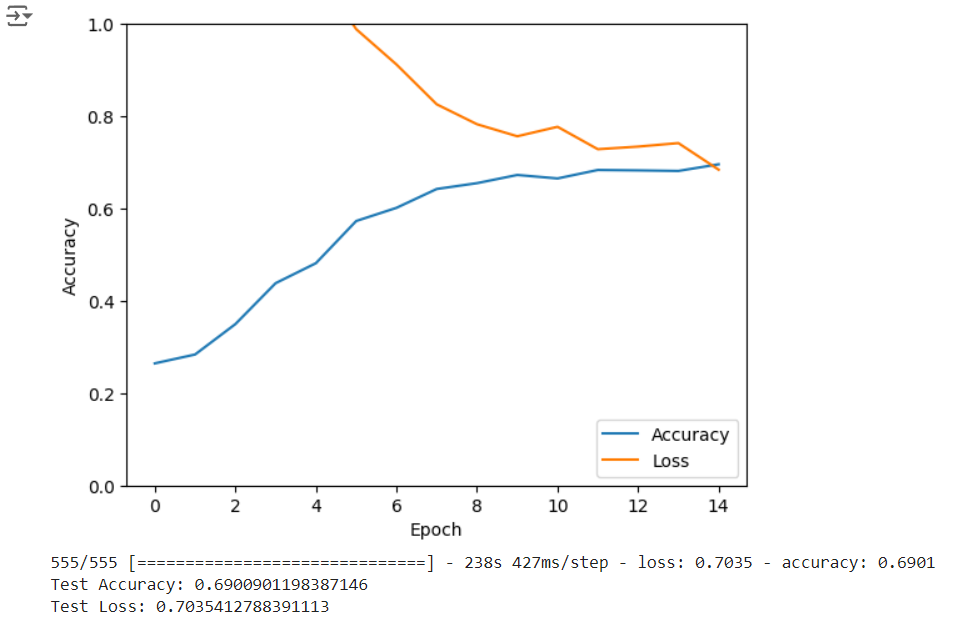



Modify the number epochs to be 30 for RestNet50 model and decrease the number of epochs to be 12 for U_Net model



Epoch 1/30
52/52 [==============================] - ETA: 0s - loss: 1.3858 - accuracy: 0.2630
Epoch 1: loss improved from inf to 1.38578, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
52/52 [==============================] - 2219s 43s/step - loss: 1.3858 - accuracy: 0.2630 - val_loss: 1.3574 - val_accuracy: 0.3247
Epoch 2/30
52/52 [==============================] - ETA: 0s - loss: 1.3373 - accuracy: 0.3252
Epoch 2: loss improved from 1.38578 to 1.33725, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
52/52 [==============================] - 33s 618ms/step - loss: 1.3373 - accuracy: 0.3252 - val_loss: 1.2606 - val_accuracy: 0.4119
Epoch 3/30
52/52 [==============================] - ETA: 0s - loss: 1.2339 - accuracy: 0.4055
Epoch 3: loss improved from 1.33725 to 1.23389, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
52/52 [==============================] - 32s 611ms/step - loss: 1.2339 - accuracy: 0.4055 - val_loss: 1.2238 - val_accuracy: 0.4017
Epoch 4/30
52/52 [==============================] - ETA: 0s - loss: 1.1727 - accuracy: 0.4244
Epoch 4: loss improved from 1.23389 to 1.17274, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
52/52 [==============================] - 30s 582ms/step - loss: 1.1727 - accuracy: 0.4244 - val_loss: 1.1394 - val_accuracy: 0.4642
Epoch 5/30
52/52 [==============================] - ETA: 0s - loss: 1.1385 - accuracy: 0.4578
Epoch 5: loss improved from 1.17274 to 1.13852, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
52/52 [==============================] - 30s 577ms/step - loss: 1.1385 - accuracy: 0.4578 - val_loss: 1.0621 - val_accuracy: 0.4829
Epoch 6/30
52/52 [==============================] - ETA: 0s - loss: 1.0176 - accuracy: 0.5311
Epoch 6: loss improved from 1.13852 to 1.01755, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
52/52 [==============================] - 31s 591ms/step - loss: 1.0176 - accuracy: 0.5311 - val_loss: 0.9178 - val_accuracy: 0.5785
Epoch 7/30
52/52 [==============================] - ETA: 0s - loss: 0.9437 - accuracy: 0.5621
Epoch 7: loss improved from 1.01755 to 0.94367, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
52/52 [==============================] - 31s 585ms/step - loss: 0.9437 - accuracy: 0.5621 - val_loss: 0.8568 - val_accuracy: 0.6170
Epoch 8/30
52/52 [==============================] - ETA: 0s - loss: 0.9002 - accuracy: 0.5861
Epoch 8: loss improved from 0.94367 to 0.90020, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
52/52 [==============================] - 31s 583ms/step - loss: 0.9002 - accuracy: 0.5861 - val_loss: 0.8297 - val_accuracy: 0.6176
Epoch 9/30
52/52 [==============================] - ETA: 0s - loss: 0.8884 - accuracy: 0.5855
Epoch 9: loss improved from 0.90020 to 0.88836, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
52/52 [==============================] - 30s 571ms/step - loss: 0.8884 - accuracy: 0.5855 - val_loss: 0.8499 - val_accuracy: 0.6152
Epoch 10/30
52/52 [==============================] - ETA: 0s - loss: 0.8320 - accuracy: 0.6291
Epoch 10: loss improved from 0.88836 to 0.83197, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
52/52 [==============================] - 31s 592ms/step - loss: 0.8320 - accuracy: 0.6291 - val_loss: 0.8800 - val_accuracy: 0.5761
Epoch 11/30
52/52 [==============================] - ETA: 0s - loss: 0.8083 - accuracy: 0.6387
Epoch 11: loss improved from 0.83197 to 0.80830, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
52/52 [==============================] - 30s 563ms/step - loss: 0.8083 - accuracy: 0.6387 - val_loss: 0.7761 - val_accuracy: 0.6482
Epoch 12/30
52/52 [==============================] - ETA: 0s - loss: 0.7922 - accuracy: 0.6426
Epoch 12: loss improved from 0.80830 to 0.79225, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
52/52 [==============================] - 31s 593ms/step - loss: 0.7922 - accuracy: 0.6426 - val_loss: 0.7878 - val_accuracy: 0.6494
Epoch 13/30
52/52 [==============================] - ETA: 0s - loss: 0.8162 - accuracy: 0.6276
Epoch 13: loss did not improve from 0.79225
52/52 [==============================] - 28s 536ms/step - loss: 0.8162 - accuracy: 0.6276 - val_loss: 0.9282 - val_accuracy: 0.5701
Epoch 14/30
52/52 [==============================] - ETA: 0s - loss: 0.7969 - accuracy: 0.6417
Epoch 14: loss did not improve from 0.79225
52/52 [==============================] - 27s 520ms/step - loss: 0.7969 - accuracy: 0.6417 - val_loss: 0.7466 - val_accuracy: 0.6837
Epoch 15/30
52/52 [==============================] - ETA: 0s - loss: 0.7667 - accuracy: 0.6543
Epoch 15: loss improved from 0.79225 to 0.76668, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
52/52 [==============================] - 29s 562ms/step - loss: 0.7667 - accuracy: 0.6543 - val_loss: 0.7481 - val_accuracy: 0.6705
Epoch 16/30
52/52 [==============================] - ETA: 0s - loss: 0.7387 - accuracy: 0.6697
Epoch 16: loss improved from 0.76668 to 0.73865, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
52/52 [==============================] - 30s 570ms/step - loss: 0.7387 - accuracy: 0.6697 - val_loss: 0.8374 - val_accuracy: 0.6512
Epoch 17/30
52/52 [==============================] - ETA: 0s - loss: 0.7835 - accuracy: 0.6564
Epoch 17: loss did not improve from 0.73865
52/52 [==============================] - 26s 503ms/step - loss: 0.7835 - accuracy: 0.6564 - val_loss: 0.7531 - val_accuracy: 0.6699
Epoch 18/30
52/52 [==============================] - ETA: 0s - loss: 0.7448 - accuracy: 0.6637
Epoch 18: loss did not improve from 0.73865
52/52 [==============================] - 29s 552ms/step - loss: 0.7448 - accuracy: 0.6637 - val_loss: 0.7489 - val_accuracy: 0.6663
Epoch 19/30
52/52 [==============================] - ETA: 0s - loss: 0.7303 - accuracy: 0.6769
Epoch 19: loss improved from 0.73865 to 0.73032, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
52/52 [==============================] - 31s 588ms/step - loss: 0.7303 - accuracy: 0.6769 - val_loss: 0.8553 - val_accuracy: 0.6386
Epoch 20/30
52/52 [==============================] - ETA: 0s - loss: 0.7112 - accuracy: 0.6787
Epoch 20: loss improved from 0.73032 to 0.71120, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
52/52 [==============================] - 32s 607ms/step - loss: 0.7112 - accuracy: 0.6787 - val_loss: 0.7210 - val_accuracy: 0.6975
Epoch 21/30
52/52 [==============================] - ETA: 0s - loss: 0.7005 - accuracy: 0.6982
Epoch 21: loss improved from 0.71120 to 0.70049, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
52/52 [==============================] - 33s 634ms/step - loss: 0.7005 - accuracy: 0.6982 - val_loss: 0.7704 - val_accuracy: 0.6566
Epoch 22/30
52/52 [==============================] - ETA: 0s - loss: 0.7097 - accuracy: 0.6928
Epoch 22: loss did not improve from 0.70049
52/52 [==============================] - 29s 562ms/step - loss: 0.7097 - accuracy: 0.6928 - val_loss: 0.7182 - val_accuracy: 0.6921
Epoch 23/30
52/52 [==============================] - ETA: 0s - loss: 0.6720 - accuracy: 0.7000
Epoch 23: loss improved from 0.70049 to 0.67201, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
52/52 [==============================] - 31s 594ms/step - loss: 0.6720 - accuracy: 0.7000 - val_loss: 0.8372 - val_accuracy: 0.6194
Epoch 24/30
52/52 [==============================] - ETA: 0s - loss: 0.6784 - accuracy: 0.7090
Epoch 24: loss did not improve from 0.67201
52/52 [==============================] - 29s 550ms/step - loss: 0.6784 - accuracy: 0.7090 - val_loss: 0.7756 - val_accuracy: 0.6735
Epoch 25/30
52/52 [==============================] - ETA: 0s - loss: 0.6693 - accuracy: 0.7115
Epoch 25: loss improved from 0.67201 to 0.66925, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
52/52 [==============================] - 32s 610ms/step - loss: 0.6693 - accuracy: 0.7115 - val_loss: 0.7120 - val_accuracy: 0.6957
Epoch 26/30
52/52 [==============================] - ETA: 0s - loss: 0.6528 - accuracy: 0.7133
Epoch 26: loss improved from 0.66925 to 0.65278, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
52/52 [==============================] - 31s 604ms/step - loss: 0.6528 - accuracy: 0.7133 - val_loss: 0.7182 - val_accuracy: 0.6999
Epoch 27/30
52/52 [==============================] - ETA: 0s - loss: 0.6522 - accuracy: 0.7241
Epoch 27: loss improved from 0.65278 to 0.65221, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
52/52 [==============================] - 32s 609ms/step - loss: 0.6522 - accuracy: 0.7241 - val_loss: 0.7239 - val_accuracy: 0.6927
Epoch 28/30
52/52 [==============================] - ETA: 0s - loss: 0.6457 - accuracy: 0.7214
Epoch 28: loss improved from 0.65221 to 0.64570, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
52/52 [==============================] - 31s 600ms/step - loss: 0.6457 - accuracy: 0.7214 - val_loss: 0.7755 - val_accuracy: 0.6879
Epoch 29/30
52/52 [==============================] - ETA: 0s - loss: 0.6711 - accuracy: 0.7075
Epoch 29: loss did not improve from 0.64570
52/52 [==============================] - 29s 549ms/step - loss: 0.6711 - accuracy: 0.7075 - val_loss: 0.6892 - val_accuracy: 0.7017
Epoch 30/30
52/52 [==============================] - ETA: 0s - loss: 0.6465 - accuracy: 0.7304
Epoch 30: loss did not improve from 0.64570
52/52 [==============================] - 28s 548ms/step - loss: 0.6465 - accuracy: 0.7304 - val_loss: 0.7023 - val_accuracy: 0.7084





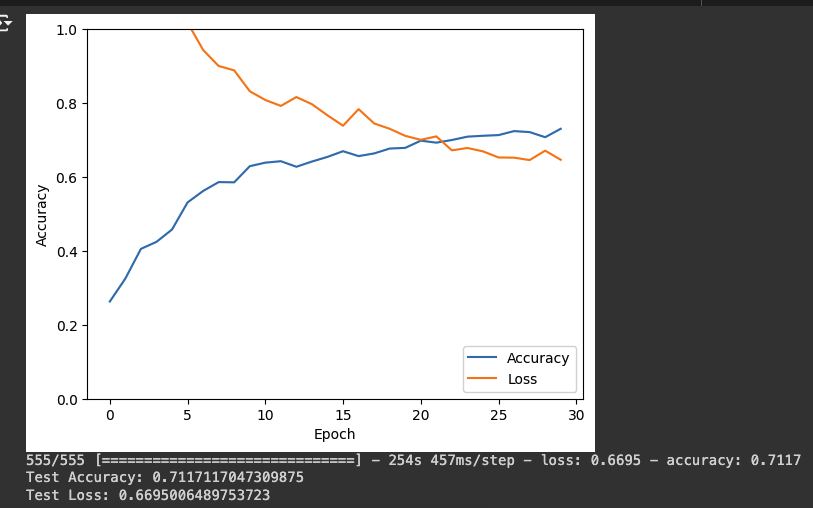



Then U-Net Model : -

Epoch 1/12
52/52 [==============================] - ETA: 0s - loss: 1.1079 - accuracy: 0.4983
Epoch 1: loss improved from inf to 1.10790, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
52/52 [==============================] - 2035s 38s/step - loss: 1.1079 - accuracy: 0.4983 - val_loss: 0.9154 - val_accuracy: 0.5947
Epoch 2/12
52/52 [==============================] - ETA: 0s - loss: 0.7790 - accuracy: 0.6613
Epoch 2: loss improved from 1.10790 to 0.77899, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
52/52 [==============================] - 131s 3s/step - loss: 0.7790 - accuracy: 0.6613 - val_loss: 0.7756 - val_accuracy: 0.6482
Epoch 3/12
52/52 [==============================] - ETA: 0s - loss: 0.5980 - accuracy: 0.7568
Epoch 3: loss improved from 0.77899 to 0.59796, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
52/52 [==============================] - 134s 3s/step - loss: 0.5980 - accuracy: 0.7568 - val_loss: 0.7943 - val_accuracy: 0.6675
Epoch 4/12
52/52 [==============================] - ETA: 0s - loss: 0.4209 - accuracy: 0.8266
Epoch 4: loss improved from 0.59796 to 0.42087, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
52/52 [==============================] - 146s 3s/step - loss: 0.4209 - accuracy: 0.8266 - val_loss: 0.9725 - val_accuracy: 0.6663
Epoch 5/12
52/52 [==============================] - ETA: 0s - loss: 0.2775 - accuracy: 0.8960
Epoch 5: loss improved from 0.42087 to 0.27748, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
52/52 [==============================] - 132s 3s/step - loss: 0.2775 - accuracy: 0.8960 - val_loss: 1.0555 - val_accuracy: 0.6524
Epoch 6/12
52/52 [==============================] - ETA: 0s - loss: 0.1943 - accuracy: 0.9330
Epoch 6: loss improved from 0.27748 to 0.19431, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
52/52 [==============================] - 134s 3s/step - loss: 0.1943 - accuracy: 0.9330 - val_loss: 1.2946 - val_accuracy: 0.6500
Epoch 7/12
52/52 [==============================] - ETA: 0s - loss: 0.1188 - accuracy: 0.9594
Epoch 7: loss improved from 0.19431 to 0.11882, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
52/52 [==============================] - 131s 3s/step - loss: 0.1188 - accuracy: 0.9594 - val_loss: 1.5759 - val_accuracy: 0.6296
Epoch 8/12
52/52 [==============================] - ETA: 0s - loss: 0.0942 - accuracy: 0.9678
Epoch 8: loss improved from 0.11882 to 0.09423, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
52/52 [==============================] - 133s 3s/step - loss: 0.0942 - accuracy: 0.9678 - val_loss: 1.6164 - val_accuracy: 0.6404
Epoch 9/12
52/52 [==============================] - ETA: 0s - loss: 0.0594 - accuracy: 0.9793
Epoch 9: loss improved from 0.09423 to 0.05945, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
52/52 [==============================] - 130s 3s/step - loss: 0.0594 - accuracy: 0.9793 - val_loss: 2.1794 - val_accuracy: 0.6518
Epoch 10/12
52/52 [==============================] - ETA: 0s - loss: 0.0327 - accuracy: 0.9880
Epoch 10: loss improved from 0.05945 to 0.03267, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
52/52 [==============================] - 134s 3s/step - loss: 0.0327 - accuracy: 0.9880 - val_loss: 2.5183 - val_accuracy: 0.6326
Epoch 11/12
52/52 [==============================] - ETA: 0s - loss: 0.0624 - accuracy: 0.9817
Epoch 11: loss did not improve from 0.03267
52/52 [==============================] - 104s 2s/step - loss: 0.0624 - accuracy: 0.9817 - val_loss: 2.0791 - val_accuracy: 0.6512
Epoch 12/12
52/52 [==============================] - ETA: 0s - loss: 0.0379 - accuracy: 0.9856
Epoch 12: loss did not improve from 0.03267
52/52 [==============================] - 105s 2s/step - loss: 0.0379 - accuracy: 0.9856 - val_loss: 2.2818 - val_accuracy: 0.6470



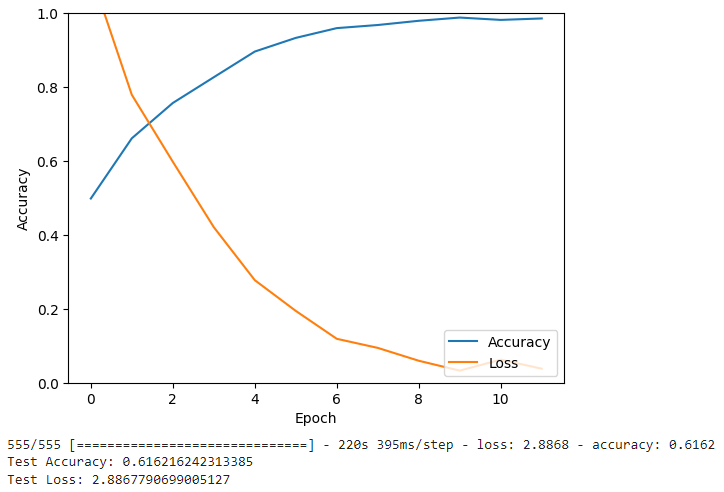






Then increase the number of epochs to be 50 rounds for both models : -



RESTNET50 MODEL
1:38
52/52 [==============================] - 25s 483ms/step - loss: 0.4297 - accuracy: 0.8380 - val_loss: 0.7030 - val_accuracy: 0.7444
1:38
after 50 round



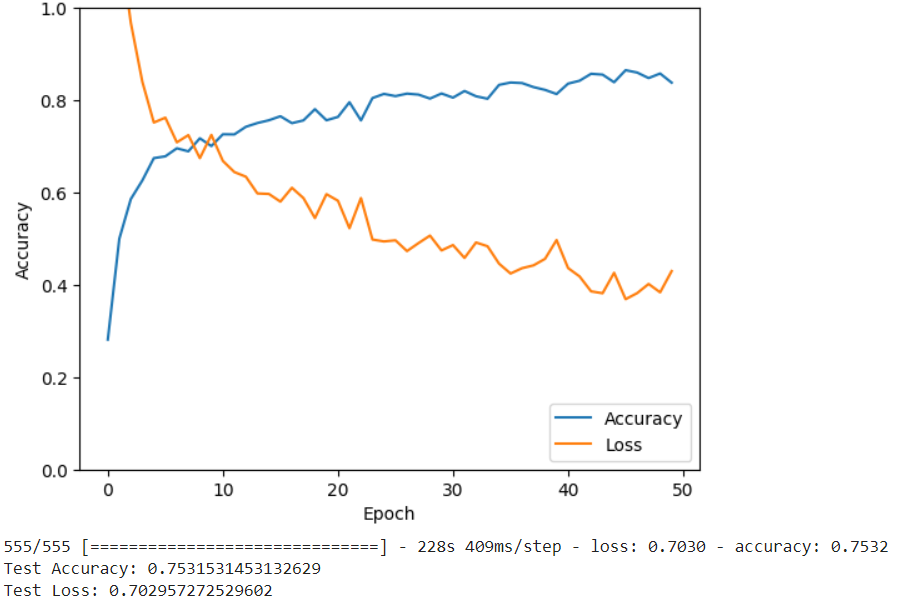





then UNet model after 50 round


Epoch 50/50
52/52 [==============================] - ETA: 0s - loss: 0.2403 - accuracy: 0.8837
Epoch 50: loss improved from 0.25272 to 0.24026, saving model to /content/drive/MyDrive/Colab Notebooks/X_Ray_Project/best_model.h5
52/52 [==============================] - 56s 1s/step - loss: 0.2403 - accuracy: 0.8837 - val_loss: 1.0417 - val_accuracy: 0.7366





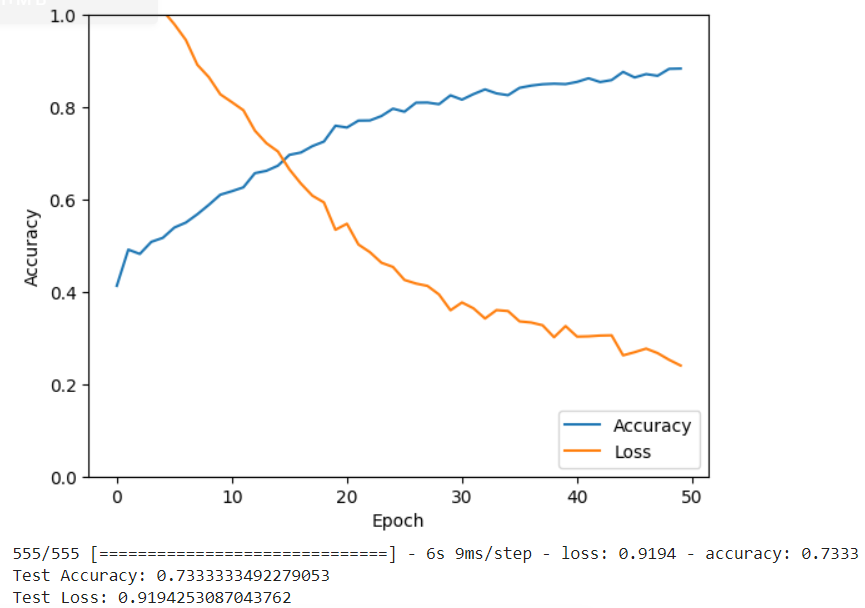





RestNet50 result with 100 epochs with 76%  Accuracy

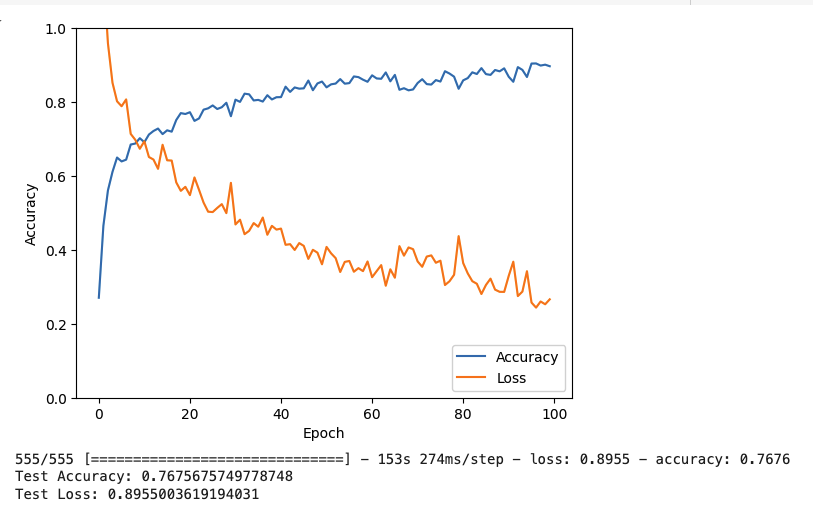






Unet/Model Results

Epoch 100/100

Epoch 100: loss did not improve from 0.20657
52/52 [==============================] - 53s 1s/step - loss: 0.2172 - accuracy: 0.8939 - val_loss: 1.0509 - val_accuracy: 0.7511



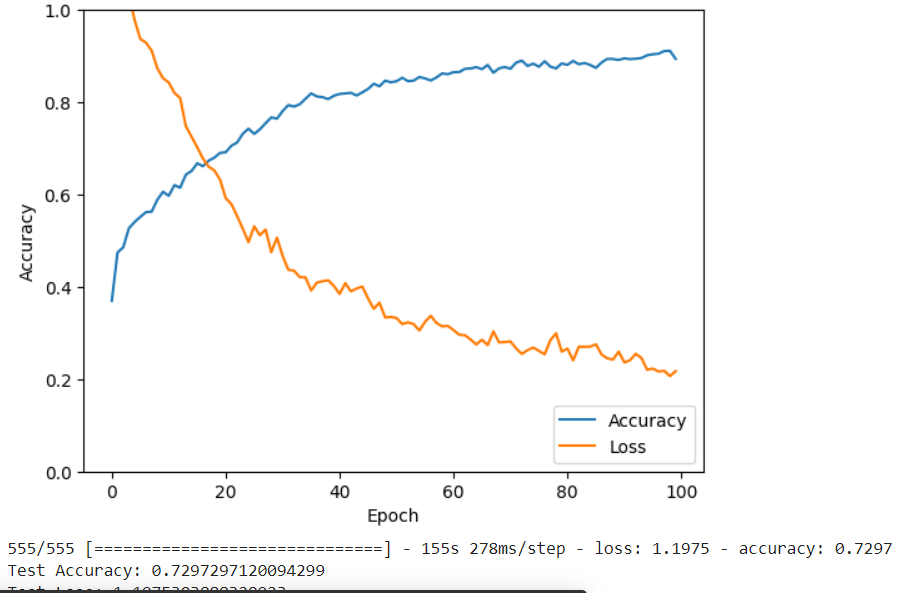